In [2]:
import json
from urllib.request import urlopen

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
from highlight_text import fig_text

from mplsoccer import Bumpy, FontManager, add_image

In [3]:
df = pd.read_csv("/work/assets/football-data.co.uk/liga2122.csv")
df["HomeTeam"].unique()

array(['Valencia', 'Cadiz', 'Mallorca', 'Alaves', 'Osasuna', 'Celta',
       'Barcelona', 'Sevilla', 'Villarreal', 'Elche', 'Betis', 'Espanol',
       'Granada', 'Ath Bilbao', 'Sociedad', 'Ath Madrid', 'Levante',
       'Getafe', 'Vallecano', 'Real Madrid'], dtype=object)

In [4]:
spaceMono_bold = 'https://github.com/googlefonts/spacemono/blob/main/fonts/SpaceMono-BoldItalic.ttf?raw=true'
from mplsoccer import FontManager
monoBFont = FontManager(spaceMono_bold)

In [5]:
points_dict = {}
def make_data(df,team):
    df = df[(df["HomeTeam"]==team)|(df["AwayTeam"]==team)]
    df.reset_index(drop=True, inplace=True)
    points = [0]
    for idx, row in df.iterrows():
        if row["HomeTeam"] == team:
            if row["FTHG"] > row["FTAG"]:
                points.append(points[-1] + 3)
            elif row["FTHG"] == row["FTAG"]:
                points.append(points[-1] + 1)
            else:
                points.append(points[-1])
        elif row["AwayTeam"] == team:
            if row["FTAG"] > row["FTHG"]:
                points.append(points[-1] + 3)
            elif row["FTAG"] == row["FTHG"]:
                points.append(points[-1] + 1)
            else:
                points.append(points[-1])
    points_dict[team] = points
    
teams = df["HomeTeam"].unique()
for team in teams:    
    make_data(df,team)

In [6]:
rank_dict = {}
_df = pd.DataFrame(points_dict)
for idx, row in _df.iterrows():
    _df.iloc[idx,:] = row.rank(ascending=False).astype(int)

In [7]:
target = _df

In [8]:
# match-week
match_day = ["" + str(num) for num in range(1, 39)]

# highlight dict --> team to highlight and their corresponding colors
highlight_dict = {
    "Tottenham": "white",
    "Liverpool": "crimson",
    "Man City": "skyblue",
    "Man United": "gold",
    "Chelsea": "blue",
    "Arsenal": "#D16C00",
    "Brighton": "#00D1AE",
    'Ath Madrid':'#CB3524',
    'Real Madrid':'white',
    'Barcelona':'#EDBB00'
}

In [9]:
# instantiate object
bumpy = Bumpy(
    scatter_color="#282A2C", line_color="#252525",  # scatter and line colors
    rotate_xticks=90,  # rotate x-ticks by 90 degrees
    ticklabel_size=17, label_size=30,  # ticklable and label font-size
    scatter_primary='D',  # marker to be used
    show_right=True,  # show position on the rightside
    plot_labels=True,  # plot the labels
    alignment_yvalue=0.1,  # y label alignment
    alignment_xvalue=0.065  # x label alignment
)

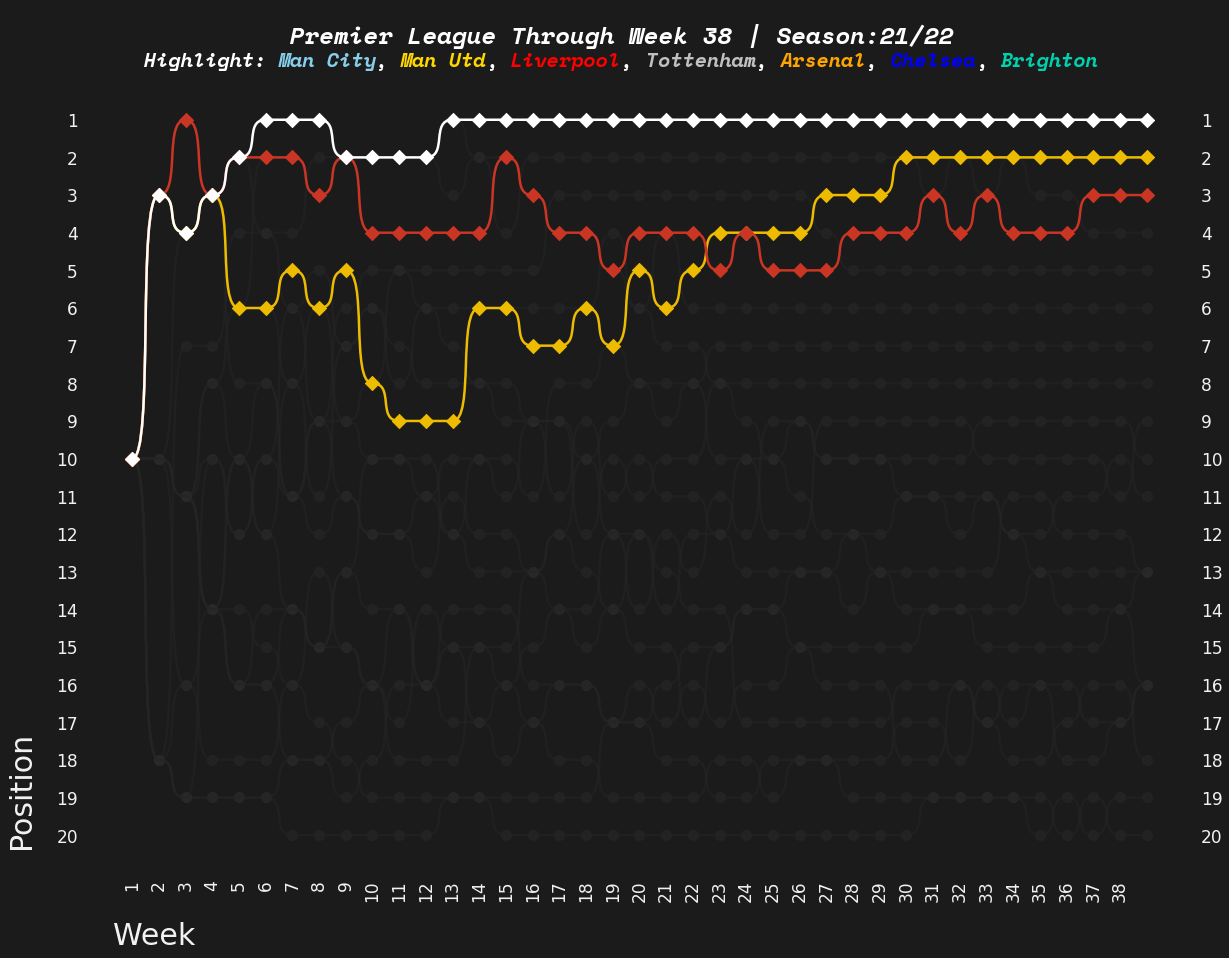

In [10]:
# plot bumpy chart
fig, ax = bumpy.plot(
    x_list=match_day,  # match-day or match-week
    y_list=np.linspace(1, 20, 20).astype(int),  # position value from 1 to 20
    values=target,  # values having positions for each team
    secondary_alpha=0.5,   # alpha value for non-shaded lines/markers
    highlight_dict=highlight_dict,  # team to be highlighted with their colors
    figsize=(20, 16),  # size of the figure
    x_label='Week', y_label='Position',  # label name
    ylim=(-0.1, 23),  # y-axis limit
    lw=2.5,   # linewidth of the connecting lines
#     fontproperties=font_normal.prop,   # fontproperties for ticklables/labels
)
fig_text(x=.5, y= .865, 
         s = 'Premier League Through Week 38 | Season:21/22',
         fontsize = 24,
         fontproperties=monoBFont.prop,
         color = 'white',
         ha='center')

fig_text(x=.5, y= .84, 
         s = 'Highlight: <Man City>, <Man Utd>, <Liverpool>, <Tottenham>, <Arsenal>, <Chelsea>, <Brighton>',
         highlight_textprops = [
           {"color":'skyblue'},
           {"color":'gold'},
           {"color":'red'},
           {"color":'#c0c0c0'},  
           {"color":'orange'},  
           {"color":'blue'},  
           {"color":'#00D1AE'},  
         ],
         fontsize = 20,
         fontproperties=monoBFont.prop,
         color = 'white',
         ha='center')

import random
# plt.savefig(f'/work/output/{random.uniform(100,1000)}.png', dpi=250, bbox_inches="tight",facecolor="#191919")